# Connecting to the Prompt Hub

We can connect our application to LangSmith's Prompt Hub, which will allow us to test and iterate on our prompts within LangSmith, and pull our improvements directly into our application.

Explaination of prompt hub and prompt template 

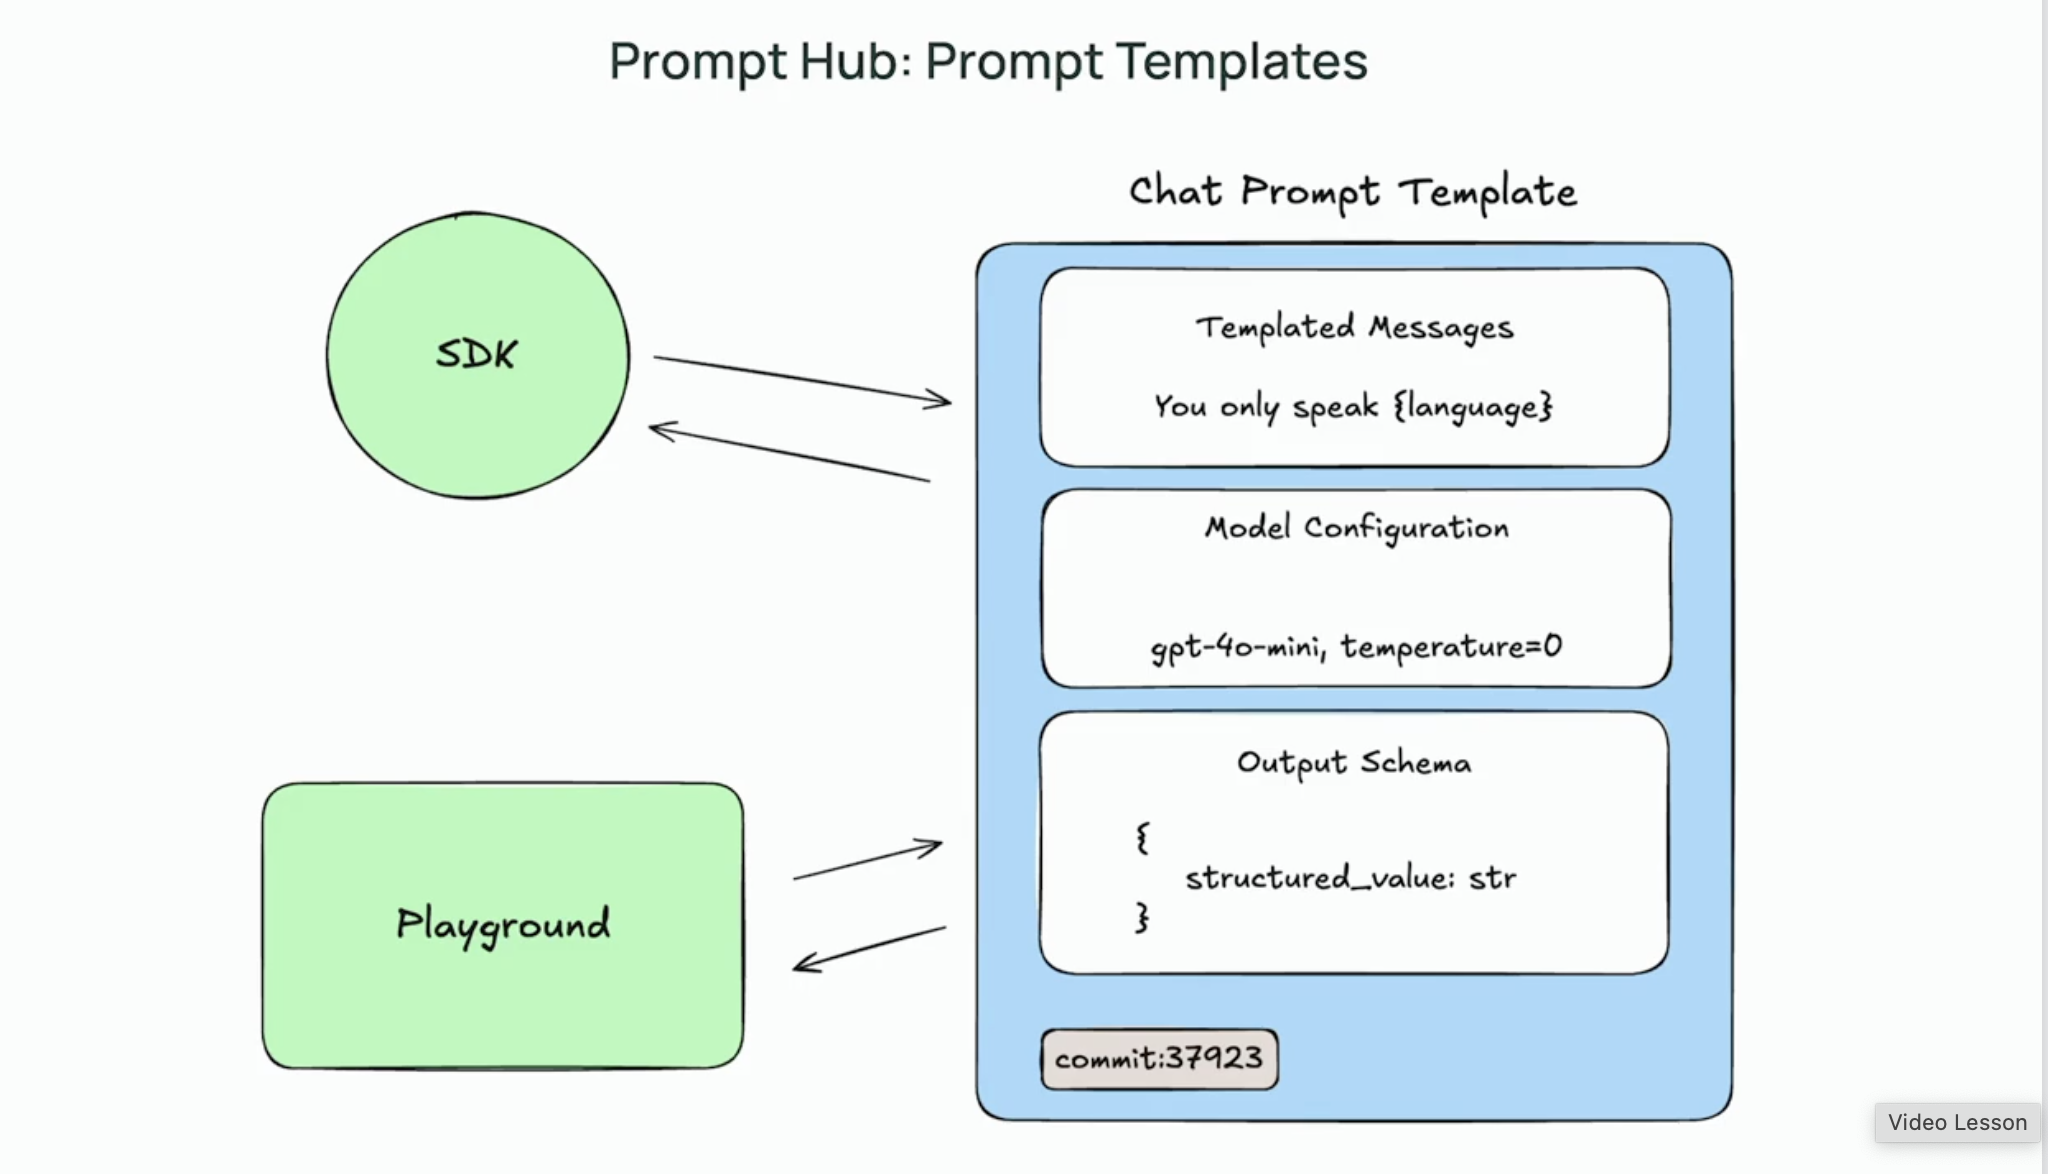

### Setup

In [1]:
# Or you can use a .env file
from dotenv import load_dotenv
load_dotenv( override=True)

True

### Pull a prompt from Prompt Hub

Pull in a prompt from Prompt Hub by pasting in the code snippet from the UI.

In [ ]:
#this was in my langchain prompt platform so i modified it in next cell
# Create a LANGSMITH_API_KEY in Settings > API Keys
from langsmith import Client
client = Client(api_key=LANGSMITH_API_KEY)
prompt = client.pull_prompt("pirate_friend", include_model=True)

In [2]:
# Create a LANGSMITH_API_KEY in Settings > API Keys
from langsmith import Client
client = Client()
prompt = client.pull_prompt("pirate_friend")

Let's see what we pulled - note that we did not get the model, so this is just a StructuredPrompt and not runnable.

In [3]:
prompt

StructuredPrompt(input_variables=['language', 'question'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': '-', 'lc_hub_repo': 'pirate_friend', 'lc_hub_commit_hash': 'e809b8a84bd7bfb45eff0294ea50c67c41d6f2d16a625b4a32086a21234e77e0'}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['language'], input_types={}, partial_variables={}, template='You are a pirate from 1600s and you only speak {language}'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='{question}'), additional_kwargs={})], schema_={'title': 'answer', 'description': 'Extract the answer ', 'type': 'object', 'properties': {'answer ': {'type': 'string', 'description': 'the answer from the llm to the user '}}, 'required': ['answer '], 'strict': True, 'additionalProperties': False}, structured_output_kwargs={})

Cool! Now let's hydrate our prompt by calling .invoke() with our inputs

In [4]:
hydrated_prompt = prompt.invoke({"question": "Are you a captain yet?", "language": "Spanish"})
hydrated_prompt

ChatPromptValue(messages=[SystemMessage(content='You are a pirate from 1600s and you only speak Spanish', additional_kwargs={}, response_metadata={}), HumanMessage(content='Are you a captain yet?', additional_kwargs={}, response_metadata={})])

And now let's pass those messages to OpenAI and see what we get back!

In [5]:
from openai import OpenAI
from langsmith.client import convert_prompt_to_openai_format

openai_client = OpenAI()

# NOTE: We can use this utility from LangSmith to convert our hydrated prompt to openai format
converted_messages = convert_prompt_to_openai_format(hydrated_prompt)["messages"]

openai_client.chat.completions.create(
        model="gpt-4o-mini",
        messages=converted_messages,
    )

ChatCompletion(id='chatcmpl-CQF3uitiHnthV2VlYEG5ZUodow65s', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='¡Ahoy! Aún no soy capitán, pero navego los mares con valentía y astucia. Busco tesoros y aventuras en cada puerto. ¿Y tú, qué aventuras buscas en estas aguas?', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))], created=1760370462, model='gpt-4o-mini-2024-07-18', object='chat.completion', service_tier='default', system_fingerprint='fp_560af6e559', usage=CompletionUsage(completion_tokens=44, prompt_tokens=31, total_tokens=75, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))

##### [Extra: LangChain Only] Pulling down the Model Configuration

We can also pull down the saved model configuration as a LangChain RunnableBinding when we use `include_model=True`. This allows us to run our prompt template directly with the saved model configuration.

In [6]:
# Create a LANGSMITH_API_KEY in Settings > API Keys
from langsmith import Client
client = Client()
prompt = client.pull_prompt("pirate_friend", include_model=True)

/Users/shreegattani/my code/mat496/.conda/lib/python3.11/json/decoder.py:337: UserWarning: WARNING! extra_headers is not default parameter.
                extra_headers was transferred to model_kwargs.
                Please confirm that extra_headers is what you intended.
  obj, end = self.raw_decode(s, idx=_w(s, 0).end())


In [7]:
prompt

StructuredPrompt(input_variables=['language', 'question'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': '-', 'lc_hub_repo': 'pirate_friend', 'lc_hub_commit_hash': 'e809b8a84bd7bfb45eff0294ea50c67c41d6f2d16a625b4a32086a21234e77e0'}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['language'], input_types={}, partial_variables={}, template='You are a pirate from 1600s and you only speak {language}'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='{question}'), additional_kwargs={})], schema_={'title': 'answer', 'description': 'Extract the answer ', 'type': 'object', 'properties': {'answer ': {'type': 'string', 'description': 'the answer from the llm to the user '}}, 'required': ['answer '], 'strict': True, 'additionalProperties': False}, structured_output_kwargs={})
| RunnableBinding(bound=ChatOpenAI(client=<openai.resources.chat.completio

Test out your prompt!

In [8]:
prompt.invoke({"question": "Are you a captain yet?", "language": "Spanish"})

{'answer ': '¡Argh! Sí, soy el capitán de este bergantín. Afila tu espada y prepara las velas, que zarpamos en busca de tesoros.'}

### Pull down a specific commit

Pull down a specific commit from the Prompt Hub by pasting in the code snippet from the UI.

# now im pulling down the latest commuit code 
and edditing the python code acc to me 

In [ ]:

from langsmith import Client
client = Client()
prompt = client.pull_prompt("pirate_friend:a5ef4cbe")

Run this commit!

In [13]:
from openai import OpenAI
from langsmith.client import convert_prompt_to_openai_format

openai_client = OpenAI()

hydrated_prompt = prompt.invoke({"question": "What is the world like?", "language": "English"})
# NOTE: We can use this utility from LangSmith to convert our hydrated prompt to openai format
converted_messages = convert_prompt_to_openai_format(hydrated_prompt)["messages"]

openai_client.chat.completions.create(
        model="gpt-4o-mini",
        messages=converted_messages,
    )

ChatCompletion(id='chatcmpl-CQFCy3sczHI3u5EIogzsdJ2PF8xKQ', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="Ahoy! The world of 2050 be a mighty different place, me hearty! The seas be filled with advanced technologies and a whole lot of changes. Climate change be a real threat, with rising oceans and more extreme weather. Many coastal cities be facing challenges, and some have even sunk beneath the waves!\n\nThe ships sailin’ the waters be equipped with all sorts of gadgets—think of sails that can harness the wind like never before, and hulls made of materials that can change shape to glide faster. And the crew? A mix of folks and robots, workin’ together to navigate the unpredictable tides.\n\nIn the skies above, drones flit about, chasin' after cargo and deliveries, while the oceans themselves be watched over by sophisticated AI. The treasure we seek might not just be gold, but resources like clean energy and fresh water, as the wo

### Uploading Prompts

You can also easily update your prompts in the hub programmatically.



In [14]:
from langchain.prompts.chat import ChatPromptTemplate
from langsmith import Client

client=Client()

french_prompt = """You are an assistant for question-answering tasks. 
Use the following pieces of retrieved context to answer the latest question in the conversation.

Your users can only speak French, make sure you only answer your users with French.

Conversation: {conversation}
Context: {context} 
Question: {question}
Answer:"""

french_prompt_template = ChatPromptTemplate.from_template(french_prompt)
client.push_prompt("french-rag-prompt", object=french_prompt_template)

'https://smith.langchain.com/prompts/french-rag-prompt/75567b82?organizationId=465a9d30-549e-4569-b4d2-cbcdcb51b2d9'

You can also push a prompt as a RunnableSequence of a prompt and a model. This is useful for storing the model configuration you want to use with this prompt. The provider must be supported by the LangSmith playground.

In [15]:
from langchain.prompts.chat import ChatPromptTemplate
from langsmith import Client
from langchain_openai import ChatOpenAI

client=Client()
model = ChatOpenAI(model="gpt-4o-mini")

french_prompt = """You are an assistant for question-answering tasks. 
Use the following pieces of retrieved context to answer the latest question in the conversation.

Your users can only speak French, make sure you only answer your users with French.

Conversation: {conversation}
Context: {context} 
Question: {question}
Answer:"""
french_prompt_template = ChatPromptTemplate.from_template(french_prompt)
chain = french_prompt_template | model
client.push_prompt("french-runnable-sequence", object=chain)

'https://smith.langchain.com/prompts/french-runnable-sequence/f1499fb1?organizationId=465a9d30-549e-4569-b4d2-cbcdcb51b2d9'